In [1]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
M_path = "cache/_M/"

In [3]:
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(N0_file, N0_offset=2)
#fisher.setup_bispectra(M_path)

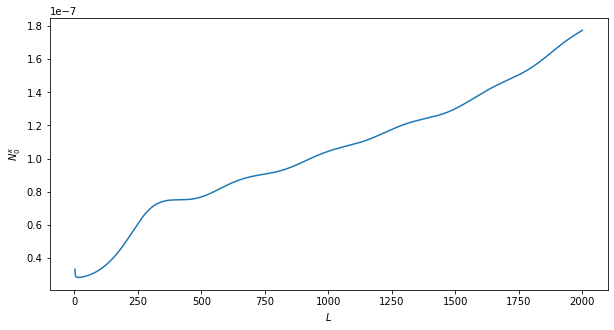

In [4]:
ellmax = 2000
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [5]:
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)

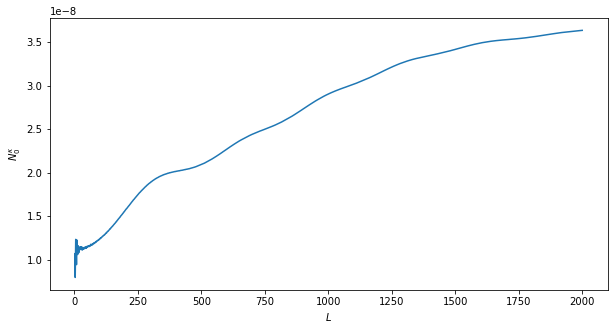

In [6]:
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [7]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
print("No foreground (S/N)")
print("---------------------------")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k = {np.sqrt(F_conv_rot)}")
F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F_gal_rot)}")
F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F_gal_conv_rot)}")
F_cib_rot = fisher.get_cib_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110)
print(f"IIw = {np.sqrt(F_cib_rot)}")
F_cib_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110)
print(f"Ikw = {np.sqrt(F_cib_conv_rot)}")
F_cib_gal_rot = fisher.get_cib_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, Lmin=110)
print(f"Igw = {np.sqrt(F_cib_gal_rot)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta, f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta, f_sky)
print(f"optimal kI= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta, f_sky)
print(f"optimal Ig= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kgI", Lmax, dL, Ntheta, f_sky)
print(f"optimal kgI= {np.sqrt(F_opt)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground (S/N)
---------------------------
kkw = 1.5034721373942388
kkw + one N_k = 2.1846196764466583
kkw + no N_k = 2.7919865432317463
ggw = 0.5939334565966138
gkw = 7.683906926447331
IIw = 0.501907060469225
Ikw = 1.0544328366845959
Igw = 9.160416534652715
Matrix([[kk, kg, 0], [gk, gg, 0], [0, 0, ww]])
Matrix([[gg/(gg*kk - gk*kg), -kg/(gg*kk - gk*kg), 0], [-gk/(gg*kk - gk*kg), kk/(gg*kk - gk*kg), 0], [0, 0, 1/ww]])
optimal kg= 12.516868234240752
Matrix([[kk, kI, 0], [Ik, II, 0], [0, 0, ww]])
Matrix([[II/(II*kk - Ik*kI), -kI/(II*kk - Ik*kI), 0], [-Ik/(II*kk - Ik*kI), kk/(II*kk - Ik*kI), 0], [0, 0, 1/ww]])
optimal kI= 3.258542492520806
Matrix([[II, Ig, 0], [gI, gg, 0], [0, 0, ww]])
Matrix([[gg/(II*gg - Ig*gI), -Ig/(II*gg - Ig*gI), 0], [-gI/(II*gg - Ig*gI), II/(II*gg - Ig*gI), 0], [0, 0, 1/ww]])
optimal Ig= 10.617914804614253
Matrix([[kk, kg, kI, 0], [gk, gg, gI, 0], [Ik, Ig, II, 0], [0, 0, 0, ww]])
Matrix([[(II*gg - Ig*gI)/(II*gg*kk - II*gk*kg - Ig*gI*kk + Ig*gk*kI + Ik*gI*kg - Ik

KeyboardInterrupt: 

In [8]:
# Array Method
Lmax = 4000
dL = 10
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher.reset_noise(N0_file)
print("No foreground (S/N)")
print("---------------------------")
Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
print(f"kkw = {np.sqrt(np.sum(F_conv_rot))}")
Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one", arr=True)
print(f"kkw + one N_k = {np.sqrt(np.sum(F_conv_rot))}")
Ls, F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none", arr=True)
print(f"kkw + no N_k = {np.sqrt(np.sum(F_conv_rot))}")
Ls, F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
print(f"ggw = {np.sqrt(np.sum(F_gal_rot))}")
Ls, F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True)
print(f"gkw = {np.sqrt(np.sum(F_gal_conv_rot))}")
Ls, F_cib_rot = fisher.get_cib_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True, Lmin=110)
print(f"IIw = {np.sqrt(np.sum(F_cib_rot))}")
Ls, F_cib_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True, Lmin=110)
print(f"Ikw = {np.sqrt(np.sum(F_cib_conv_rot))}")
Ls, F_cib_gal_rot = fisher.get_cib_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, arr=True, Lmin=110)
print(f"Igw = {np.sqrt(np.sum(F_cib_gal_rot))}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground (S/N)
---------------------------
kkw = 1.5031884105269817
kkw + one N_k = 2.5210283665949555
kkw + no N_k = 2.7906280107417185
ggw = 0.5938235429220576
gkw = 7.683024337348193
IIw = 0.505604837166747
Ikw = 1.0630530667433153
Igw = 9.197020585018361
---------------------------
Time = 29.440276861190796


In [9]:
Lmax = 4000
dL = 2
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=False)
print("Foreground (baseline) (S/N)")
print("---------------------------")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k = {np.sqrt(F_conv_rot)}")
F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F_gal_rot)}")
F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F_gal_conv_rot)}")
F_cib_rot = fisher.get_cib_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"IIw = {np.sqrt(F_cib_rot)}")
F_cib_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"Ikw = {np.sqrt(F_cib_conv_rot)}")
F_cib_gal_rot = fisher.get_cib_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"Igw = {np.sqrt(F_cib_gal_rot)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta, f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta, f_sky)
print(f"optimal kI= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta, f_sky)
print(f"optimal Ig= {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kgI", Lmax, dL, Ntheta, f_sky)
# print(f"optimal kgI= {np.sqrt(F_opt)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


Foreground (baseline) (S/N)
---------------------------
kkw = 0.49940052374159744
kkw + one N_k = 0.8894904669460034
kkw + no N_k = 1.2557241835384798
ggw = 0.2805801270219283
gkw = 2.768492004954928
IIw = 0.3325216653944979
Ikw = 0.6832956944718844
Igw = 4.671930431304752
Matrix([[kk, kg, 0], [gk, gg, 0], [0, 0, ww]])
Matrix([[gg/(gg*kk - gk*kg), -kg/(gg*kk - gk*kg), 0], [-gk/(gg*kk - gk*kg), kk/(gg*kk - gk*kg), 0], [0, 0, 1/ww]])
optimal kg= 4.32920219129425
Matrix([[kk, kI, 0], [Ik, II, 0], [0, 0, ww]])
Matrix([[II/(II*kk - Ik*kI), -kI/(II*kk - Ik*kI), 0], [-Ik/(II*kk - Ik*kI), kk/(II*kk - Ik*kI), 0], [0, 0, 1/ww]])
optimal kI= 0.9656641451593829
Matrix([[II, Ig, 0], [gI, gg, 0], [0, 0, ww]])
Matrix([[gg/(II*gg - Ig*gI), -Ig/(II*gg - Ig*gI), 0], [-gI/(II*gg - Ig*gI), II/(II*gg - Ig*gI), 0], [0, 0, 1/ww]])
optimal Ig= 5.055786467433724
---------------------------
Time = 368.70768189430237


In [10]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=False)
print("Foreground (goal) (S/N)")
print("---------------------------")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"kkw = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print(f"kkw + one N_k = {np.sqrt(F_conv_rot)}")
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print(f"kkw + no N_k = {np.sqrt(F_conv_rot)}")
F_gal_rot = fisher.get_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"ggw = {np.sqrt(F_gal_rot)}")
F_gal_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"gkw = {np.sqrt(F_gal_conv_rot)}")
F_cib_rot = fisher.get_cib_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"IIw = {np.sqrt(F_cib_rot)}")
F_cib_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"Ikw = {np.sqrt(F_cib_conv_rot)}")
F_cib_gal_rot = fisher.get_cib_gal_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print(f"Igw = {np.sqrt(F_cib_gal_rot)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kg", Lmax, dL, Ntheta, f_sky)
print(f"optimal kg= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("kI", Lmax, dL, Ntheta, f_sky)
print(f"optimal kI= {np.sqrt(F_opt)}")
F_opt = fisher.get_optimal_bispectrum_Fisher("Ig", Lmax, dL, Ntheta, f_sky)
print(f"optimal Ig= {np.sqrt(F_opt)}")
# F_opt = fisher.get_optimal_bispectrum_Fisher("kgI", Lmax, dL, Ntheta, f_sky)
# print(f"optimal kgI= {np.sqrt(F_opt)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

Foreground (goal) (S/N)
---------------------------
kkw = 0.7468515752391627
kkw + one N_k = 1.2000043806401977
kkw + no N_k = 1.585042365866774
ggw = 0.3483047967730217
gkw = 3.8234836060332396
IIw = 0.42444762101682876
Ikw = 0.9272652886677805
Igw = 5.840883296233909
Matrix([[kk, kg, 0], [gk, gg, 0], [0, 0, ww]])
Matrix([[gg/(gg*kk - gk*kg), -kg/(gg*kk - gk*kg), 0], [-gk/(gg*kk - gk*kg), kk/(gg*kk - gk*kg), 0], [0, 0, 1/ww]])
optimal kg= 6.192424780917613
Matrix([[kk, kI, 0], [Ik, II, 0], [0, 0, ww]])
Matrix([[II/(II*kk - Ik*kI), -kI/(II*kk - Ik*kI), 0], [-Ik/(II*kk - Ik*kI), kk/(II*kk - Ik*kI), 0], [0, 0, 1/ww]])
optimal kI= 1.4795671045776222
Matrix([[II, Ig, 0], [gI, gg, 0], [0, 0, ww]])
Matrix([[gg/(II*gg - Ig*gI), -Ig/(II*gg - Ig*gI), 0], [-gI/(II*gg - Ig*gI), II/(II*gg - Ig*gI), 0], [0, 0, 1/ww]])
optimal Ig= 6.316346689152233
---------------------------
Time = 359.5514585971832


In [11]:
def get_Ls_sample(ellmax, Nells):    
    part1 = 200
    part2 = 1500
    if ellmax <= part1:
        return np.linspace(2, part1, Nells)
    if ellmax <= part2:
        ells_part1 = np.linspace(2, part1, Nells // 2)
        Nells_remaining = Nells - np.size(ells_part1)
        ells_remaining = np.linspace(part1 + 1, ellmax, Nells_remaining)
        return np.concatenate((ells_part1, ells_remaining))
    ells_part1 = np.linspace(2, part1, Nells//3)
    ells_part2 = np.linspace(part1 + 1, part2, Nells//3)
    Nells_remaining = Nells - np.size(ells_part1) - np.size(ells_part2)
    ells_remaining = np.linspace(part2 + 1, ellmax, Nells_remaining)
    return np.concatenate((ells_part1, ells_part2, ells_remaining)).astype("double")

149.6
689.1090909090909
988.2727272727273
120.8
358.4545454545455
933.1636363636364
126.8
334.83636363636367
838.6909090909091
27.588377237319946


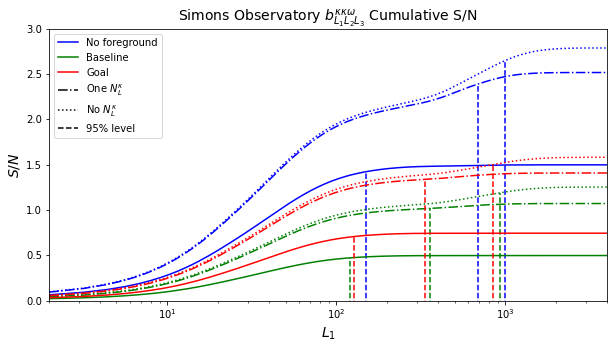

In [12]:
Nells = 500
level = 0.95
colors = ["blue", "green", "red"]
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["No foreground", "Baseline", "Goal"]
linestyles = ["-", "dashdot", "dotted"]
include_N0_kappas = ["both", "one", "none"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    for jjj, include_N0_kappa in enumerate(include_N0_kappas):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        Ls = get_Ls_sample(Lmax, Nells)
        F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True, include_N0_kappa=include_N0_kappa)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        if jjj == 0:
            plt.semilogx(Ls, SNs, label=labels[iii], color=colors[iii], linestyle=linestyles[jjj])
        else:
            plt.semilogx(Ls, SNs, color=colors[iii], linestyle=linestyles[jjj])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.title("Simons Observatory $b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="One $N_L^{\kappa}$", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="No $N_L^{\kappa}$", linestyle="dotted", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(0, 3)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

120.8
126.8
547.4000000000001
531.6545454545455
2428.77245508982
2264.1676646706587


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


988.2727272727273


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


941.0363636363637


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2578.4131736526947


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2428.77245508982


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2383.880239520958


/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:120: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * 2 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:121: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


2234.2395209580836
66.37088084220886


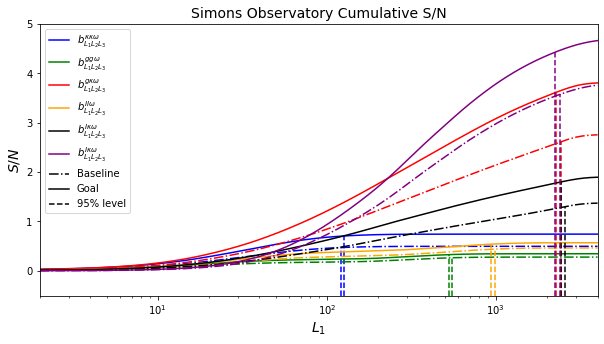

In [15]:
Nells = 500
level = 0.95
colors = ["blue", "green", "red", "orange", "k", "purple"]
N0_files = ["cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["Baseline", "Goal"]
bi_labels = ["$b_{L_1L_2L_3}^{\kappa\kappa\omega}$ ", "$b_{L_1L_2L_3}^{gg\omega}$ ", "$b_{L_1L_2L_3}^{g\kappa\omega}$ ", "$b_{L_1L_2L_3}^{II\omega}$ ", "$b_{L_1L_2L_3}^{I\kappa\omega}$", "$b_{L_1L_2L_3}^{I\kappa\omega}$"]
linestyles = ["dashdot", "-"]
offsets = [2,2]
N0_ell_factors = [False, False] 
t0 = time.time()
for jjj in range(len(colors)):
    plt.plot([1e10], [1e10], label=bi_labels[jjj], color=colors[jjj])
    for iii , N0_file in enumerate(N0_files):
        fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        Ls = get_Ls_sample(Lmax, Nells)
        if jjj == 0:
            F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 1:
            F_conv_rot = fisher.get_gal_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 2:
            F_conv_rot = fisher.get_gal_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 3:
            F_conv_rot = fisher.get_cib_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 4:
            F_conv_rot = fisher.get_cib_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        elif jjj == 5:
            F_conv_rot = fisher.get_cib_gal_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        plt.semilogx(Ls, SNs, color=colors[jjj], linestyle=linestyles[iii])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[jjj], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.plot([1e10], [1e10], label="Baseline", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="Goal", linestyle="-", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.title("Simons Observatory Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.ylim(-0.5, 5)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

In [14]:
# CAMB
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["no foreground", "foreground (baseline)", " foreground (goal)"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky=f_sky, auto=True, camb=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, f_sky=f_sky, auto=False, camb=True)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.2066808457302894
Cross ps S/N = 20.82505660462374
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.047772545626157924
Cross ps S/N = 9.52417000129666
---------------------------
SO +  foreground (goal)
Auto ps S/N = 0.08215667260988076
Cross ps S/N = 11.768807786632827
---------------------------
57.77592587471008


In [15]:
# My Cl_omega
Lmax = 4000
f_sky = 0.4
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["no foreground", "foreground (baseline)", " foreground (goal)"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
ell_file = "cache/_M/kappa-kappa/20000_1000/ells.npy"
M_file = "cache/_M/kappa-kappa/20000_1000/M.npy"
for iii, N0_file in enumerate(N0_files):
    fisher.reset_noise(N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
    F = fisher.get_rotation_ps_Fisher(Lmax, ell_file=ell_file, M_file=M_file, f_sky=f_sky, auto=True)
    print(f"SO + {labels[iii]}")
    print(f"Auto ps S/N = {np.sqrt(F)}")
    F = fisher.get_rotation_ps_Fisher(Lmax, ell_file=ell_file, M_file=M_file, f_sky=f_sky, auto=False)
    print(f"Cross ps S/N = {np.sqrt(F)}")
    print("---------------------------")
t1 = time.time()
print(t1-t0)

SO + no foreground
Auto ps S/N = 0.20757108108020303
Cross ps S/N = 20.7935976047498
---------------------------
SO + foreground (baseline)
Auto ps S/N = 0.047971150124527
Cross ps S/N = 9.51668422260621
---------------------------
SO +  foreground (goal)
Auto ps S/N = 0.08256013891070675
Cross ps S/N = 11.76429330286749
---------------------------
119.34560465812683
